In [7]:
import os, glob
import numpy as np
import pandas as pd
import math
import plotly.graph_objects as go
from scipy.stats import norm
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.weightstats import ztest
from scipy.stats import norm

In [8]:
chr_list = list(range(1, 23)) + ['X', 'Y']

In [3]:
chr_list

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 'X',
 'Y']

In [4]:
def log_oods_ratio(p1,p2):
    term1 = math.log2(p1/(1-p1))
    term2 = math.log2(p2/(1-p2))
    return (term1-term2)
def calculate_diff_probab(p1,p2):
    return((p2-p1)*max(p1,p2))

In [5]:
df_dict = {}
df_list = []
for chr_name in chr_list:
    print(chr_name)
    base_dir = "/data/projects/PSB/DNABERT_data/Donor/chr"+str(chr_name)
    concat_probab = np.load(base_dir+"/Prediction_result/pred_results.npy")
    print(len(concat_probab))
    df = pd.read_csv(base_dir+"/all_data_new.tsv", sep= "\t")
    print(df.shape)
    Reference_probab = concat_probab[::2]
    Alternative_probab = concat_probab[1::2]
    df['Ref_probab']=Reference_probab
    df['Alt_probab']=Alternative_probab
    df['ScoreChange'] = df.apply(lambda row: calculate_diff_probab(row['Ref_probab'], row['Alt_probab']), axis=1)
    df['LogOddRatio'] = df.apply(lambda row: log_oods_ratio(row['Ref_probab'], row['Alt_probab']), axis=1)
    df_list.append(df)

1
13224220
(6612110, 13)
2
12350468
(6175234, 13)
3
11046004
(5523002, 13)
4
6613666
(3306833, 13)
5
7590208
(3795104, 13)
6
8110340
(4055170, 13)
7
8319342
(4159671, 13)
8
7631940
(3815970, 13)
9
6410584
(3205292, 13)
10
6785948
(3392974, 13)
11
10415152
(5207576, 13)
12
9011074
(4505537, 13)
13
2816912
(1408456, 13)
14
6090988
(3045494, 13)
15
6405066
(3202533, 13)
16
8888788
(4444394, 13)
17
10569426
(5284713, 13)
18
3167764
(1583882, 13)
19
9724556
(4862278, 13)
20
4308868
(2154434, 13)
21
2344580
(1172290, 13)
22
3717298
(1858649, 13)
X
3621776
(1810888, 13)
Y
38368
(19184, 13)


In [45]:
concatenated_df = pd.concat(df_list)

In [46]:
concatenated_df.shape

(84601668, 17)

In [47]:
concatenated_df.head()

,index,chr,strand,Donor_coordinates,Transcript_coordinates,dbsnp_id,varinat_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ensemble_Transcript_ID,Ref_probab,Alt_probab,ScoreChange,LogOddRatio
0,0,chr1,-,24413634-24413713,24391258-24416153,rs1643860199,24413637,24413638,T,G,ACCTCAGGGACCGGTCCCCCCGCCGGAACTGCTTCCTACCTGGTCC...,ACCGCAGGGACCGGTCCCCCCGCCGGAACTGCTTCCTACCTGGTCC...,ENST00000498488,0.350596,0.462011,0.051475,-0.669657
1,1,chr1,-,24413634-24413713,24391258-24416153,rs753987026,24413638,24413639,C,T,ACCTCAGGGACCGGTCCCCCCGCCGGAACTGCTTCCTACCTGGTCC...,ACCTTAGGGACCGGTCCCCCCGCCGGAACTGCTTCCTACCTGGTCC...,ENST00000498488,0.350596,0.284591,-0.023141,0.440572
2,2,chr1,-,24413634-24413713,24391258-24416153,rs1643860744,24413639,24413640,A,T,ACCTCAGGGACCGGTCCCCCCGCCGGAACTGCTTCCTACCTGGTCC...,ACCTCTGGGACCGGTCCCCCCGCCGGAACTGCTTCCTACCTGGTCC...,ENST00000498488,0.350596,0.350378,-0.000076,0.001380
3,3,chr1,-,24413634-24413713,24391258-24416153,rs541090385,24413642,24413643,G,A,ACCTCAGGGACCGGTCCCCCCGCCGGAACTGCTTCCTACCTGGTCC...,ACCTCAGGAACCGGTCCCCCCGCCGGAACTGCTTCCTACCTGGTCC...,ENST00000498488,0.350596,0.391830,0.016157,-0.255060
4,4,chr1,-,24413634-24413713,24391258-24416153,rs541090385,24413642,24413643,G,C,ACCTCAGGGACCGGTCCCCCCGCCGGAACTGCTTCCTACCTGGTCC...,ACCTCAGGCACCGGTCCCCCCGCCGGAACTGCTTCCTACCTGGTCC...,ENST00000498488,0.350596,0.322083,-0.009996,0.184368


In [48]:
#df_interest = df_interest[((df_interest['Ref_probab']>0.5) & (df_interest['Alt_probab']<0.5))|((df_interest['Ref_probab']<0.5) & (df_interest['Alt_probab']>0.5))]
# df_interest = concatenated_df[(concatenated_df['Ref_probab']>0.5)|(concatenated_df['Alt_probab']>0.5)]
# df_interest
filtered_df1 = concatenated_df[(concatenated_df['Ref_probab'] > 0.5) & (concatenated_df['Alt_probab'] <= 0.5)]
filtered_df2 = concatenated_df[(concatenated_df['Ref_probab'] <= 0.5) & (concatenated_df['Alt_probab'] > 0.5)]
df_interest = pd.concat([filtered_df1, filtered_df2])
df_interest

,index,chr,strand,Donor_coordinates,Transcript_coordinates,dbsnp_id,varinat_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ensemble_Transcript_ID,Ref_probab,Alt_probab,ScoreChange,LogOddRatio
2627,2627,chr1,+,24449588-24449667,24415803-24472976,rs1401534466,24449613,24449615,CC,C,CCAGGCACCTCGTGAGCTGGCCTTTCCTTTTGTACATGGTAAGAGA...,CCAGGCACCTCGTGAGCTGGCCTTTCTTTTGTACATGGTAAGAGAA...,ENST00000003912,0.976278,0.046042,-0.908168,9.735875
2673,2673,chr1,+,24449588-24449667,24415814-24466310,rs1401534466,24449613,24449615,CC,C,CCAGGCACCTCGTGAGCTGGCCTTTCCTTTTGTACATGGTAAGAGA...,CCAGGCACCTCGTGAGCTGGCCTTTCTTTTGTACATGGTAAGAGAA...,ENST00000339255,0.976278,0.046042,-0.908168,9.735875
2719,2719,chr1,+,24449588-24449667,24415813-24454824,rs1401534466,24449613,24449615,CC,C,CCAGGCACCTCGTGAGCTGGCCTTTCCTTTTGTACATGGTAAGAGA...,CCAGGCACCTCGTGAGCTGGCCTTTCTTTTGTACATGGTAAGAGAA...,ENST00000358028,0.976278,0.046042,-0.908168,9.735875
2765,2765,chr1,+,24449588-24449667,24415802-24472976,rs1401534466,24449613,24449615,CC,C,CCAGGCACCTCGTGAGCTGGCCTTTCCTTTTGTACATGGTAAGAGA...,CCAGGCACCTCGTGAGCTGGCCTTTCTTTTGTACATGGTAAGAGAA...,ENST00000374399,0.976278,0.046042,-0.908168,9.735875
3076,3076,chr1,+,24458938-24459017,24415803-24472976,rs1338018203,24458950,24458951,G,A,GGGCTACATTCTGTCCACAACCATTGCTATCACAGCAGGTAAGGGT...,GGGCTACATTCTATCCACAACCATTGCTATCACAGCAGGTAAGGGT...,ENST00000003912,0.562571,0.330971,-0.130291,1.378349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19046,92508,chrY,+,2787015-2787094,2752296-2845689,rs1019354171,2787052,2787053,G,A,GTCCCGTTGCTGCGGTGAGCTGGCTGCGTTGATGGGCGGTAAGTGG...,GTCCCGTTGCTGCGGTGAGCTGGCTGCGTTGATGGGCAGTAAGTGG...,ENST00000681787,0.420749,0.610241,0.115636,-1.108023
19050,92512,chrY,+,2787015-2787094,2752296-2845689,rs780561417,2787043,2787044,T,C,GTCCCGTTGCTGCGGTGAGCTGGCTGCGTTGATGGGCGGTAAGTGG...,GTCCCGTTGCTGCGGTGAGCTGGCTGCGCTGATGGGCGGTAAGTGG...,ENST00000679518,0.420749,0.669274,0.166331,-1.478190
19052,92514,chrY,+,2787015-2787094,2752296-2845689,rs1019354171,2787052,2787053,G,A,GTCCCGTTGCTGCGGTGAGCTGGCTGCGTTGATGGGCGGTAAGTGG...,GTCCCGTTGCTGCGGTGAGCTGGCTGCGTTGATGGGCAGTAAGTGG...,ENST00000679518,0.420749,0.610241,0.115636,-1.108023
19056,92518,chrY,+,2787015-2787094,2752296-2854641,rs780561417,2787043,2787044,T,C,GTCCCGTTGCTGCGGTGAGCTGGCTGCGTTGATGGGCGGTAAGTGG...,GTCCCGTTGCTGCGGTGAGCTGGCTGCGCTGATGGGCGGTAAGTGG...,ENST00000681940,0.420749,0.669274,0.166331,-1.478190


In [49]:
df_interest['score_change_new'] = df_interest['Alt_probab']-df_interest['Ref_probab']

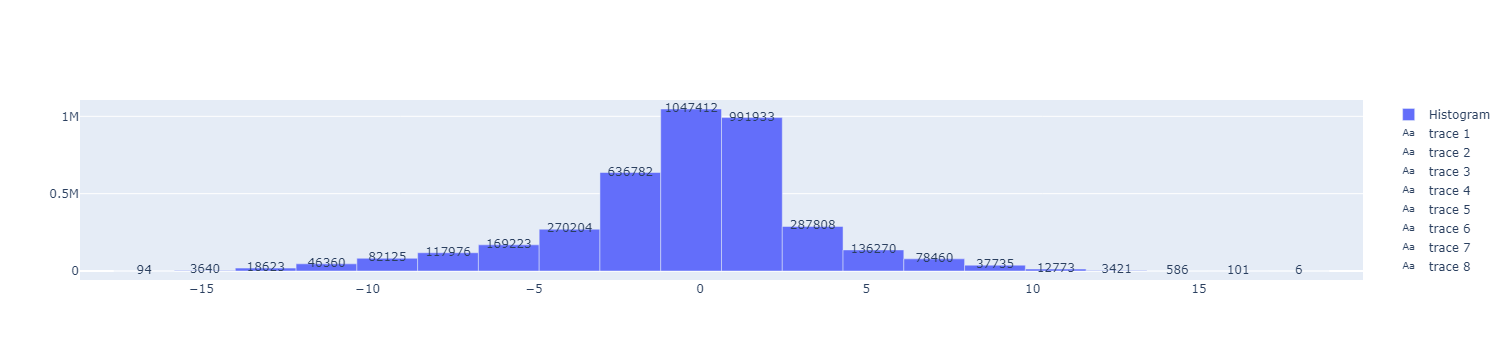

In [50]:
# Plot the figure
counts, bins = np.histogram(df_interest['LogOddRatio'], bins=20)
bin_midpoints = bins[:-1] + np.diff(bins)/2

fig = go.Figure()

fig.add_trace(go.Bar(
    x=bin_midpoints,
    y=counts,
    width=np.diff(bins), # makes bars have correct widths
    name='Histogram'
))
# add text labels for counts
for i in range(len(counts)):
    fig.add_trace(go.Scatter(
        x=[bin_midpoints[i]],
        y=[counts[i]],
        text=[str(counts[i])],
        mode='text',
    ))
fig.show()

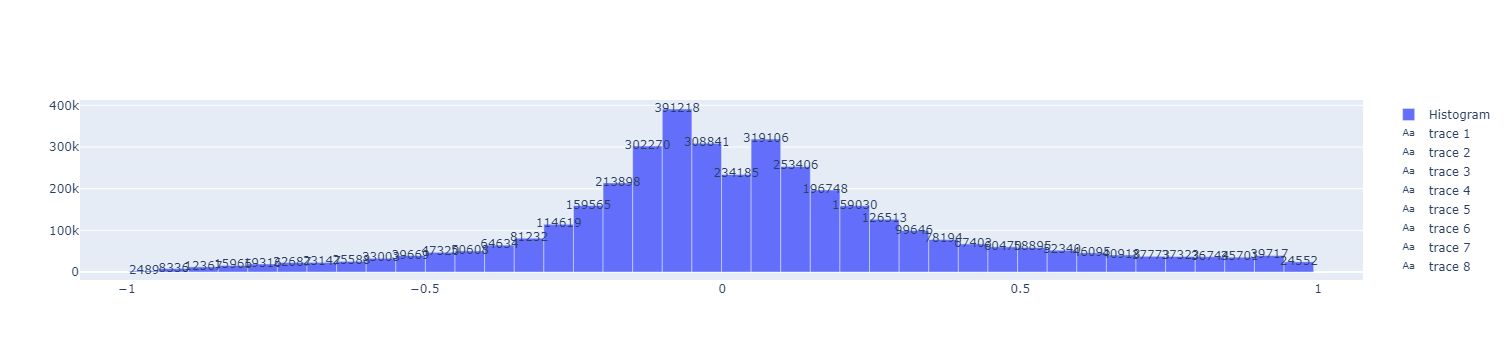

In [51]:
# Plot the figure
counts, bins = np.histogram(df_interest['ScoreChange'], bins=40)
bin_midpoints = bins[:-1] + np.diff(bins)/2

fig = go.Figure()

fig.add_trace(go.Bar(
    x=bin_midpoints,
    y=counts,
    width=np.diff(bins), # makes bars have correct widths
    name='Histogram'
))
# add text labels for counts
for i in range(len(counts)):
    fig.add_trace(go.Scatter(
        x=[bin_midpoints[i]],
        y=[counts[i]],
        text=[str(counts[i])],
        mode='text',
    ))

fig.show()

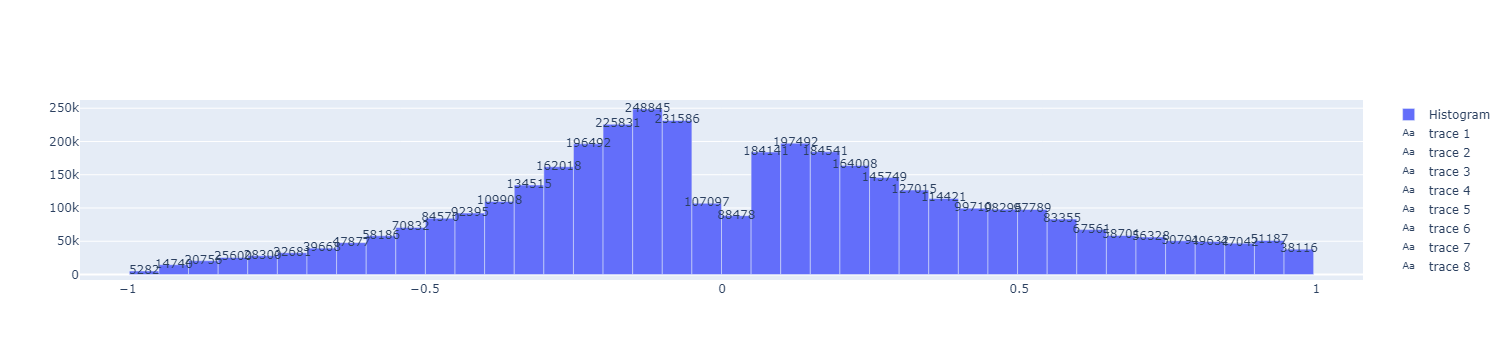

In [52]:
# Plot the figure
counts, bins = np.histogram(df_interest['score_change_new'], bins=40)
bin_midpoints = bins[:-1] + np.diff(bins)/2

fig = go.Figure()

fig.add_trace(go.Bar(
    x=bin_midpoints,
    y=counts,
    width=np.diff(bins), # makes bars have correct widths
    name='Histogram'
))
# add text labels for counts
for i in range(len(counts)):
    fig.add_trace(go.Scatter(
        x=[bin_midpoints[i]],
        y=[counts[i]],
        text=[str(counts[i])],
        mode='text',
    ))

fig.show()

In [53]:

# Calculate the z-score for each data point
# df_interest['Z_score'] = (df_interest['LogOddRatio'] - mean) / std

# # Calculate the p-value for each z-score
# df_interest['2S_P_value'] = 2 * (1 - norm.cdf(abs(df_interest['Z_score'])))
# df_interest['1S_P_value'] = 1 - norm.cdf(df_interest['Z_score'])

In [54]:
df_interest = df_interest[(df_interest['ScoreChange']>0.25)|(df_interest['ScoreChange']<-0.25)]
df_interest

,index,chr,strand,Donor_coordinates,Transcript_coordinates,dbsnp_id,varinat_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ensemble_Transcript_ID,Ref_probab,Alt_probab,ScoreChange,LogOddRatio,score_change_new
2627,2627,chr1,+,24449588-24449667,24415803-24472976,rs1401534466,24449613,24449615,CC,C,CCAGGCACCTCGTGAGCTGGCCTTTCCTTTTGTACATGGTAAGAGA...,CCAGGCACCTCGTGAGCTGGCCTTTCTTTTGTACATGGTAAGAGAA...,ENST00000003912,0.976278,0.046042,-0.908168,9.735875,-0.930236
2673,2673,chr1,+,24449588-24449667,24415814-24466310,rs1401534466,24449613,24449615,CC,C,CCAGGCACCTCGTGAGCTGGCCTTTCCTTTTGTACATGGTAAGAGA...,CCAGGCACCTCGTGAGCTGGCCTTTCTTTTGTACATGGTAAGAGAA...,ENST00000339255,0.976278,0.046042,-0.908168,9.735875,-0.930236
2719,2719,chr1,+,24449588-24449667,24415813-24454824,rs1401534466,24449613,24449615,CC,C,CCAGGCACCTCGTGAGCTGGCCTTTCCTTTTGTACATGGTAAGAGA...,CCAGGCACCTCGTGAGCTGGCCTTTCTTTTGTACATGGTAAGAGAA...,ENST00000358028,0.976278,0.046042,-0.908168,9.735875,-0.930236
2765,2765,chr1,+,24449588-24449667,24415802-24472976,rs1401534466,24449613,24449615,CC,C,CCAGGCACCTCGTGAGCTGGCCTTTCCTTTTGTACATGGTAAGAGA...,CCAGGCACCTCGTGAGCTGGCCTTTCTTTTGTACATGGTAAGAGAA...,ENST00000374399,0.976278,0.046042,-0.908168,9.735875,-0.930236
3089,3089,chr1,+,24458938-24459017,24415803-24472976,rs1479852926,24458982,24458983,G,C,GGGCTACATTCTGTCCACAACCATTGCTATCACAGCAGGTAAGGGT...,GGGCTACATTCTGTCCACAACCATTGCTATCACAGCAGGTAAGGCT...,ENST00000003912,0.562571,0.107575,-0.255967,3.415373,-0.454996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18924,88837,chrY,+,2774701-2774780,2752296-2845689,rs148132561,2774747,2774748,C,A,CTCTTTGTTCACAGAACCCACCAAGAAGCCAAACTCAGGTGAGTGT...,CTCTTTGTTCACAGAACCCACCAAGAAGCCAAACTCAGGTGAGTGT...,ENST00000681787,0.352675,0.767167,0.317984,-2.596395,0.414492
18960,88873,chrY,+,2774701-2774780,2752296-2845689,rs1261941013,2774743,2774744,G,A,CTCTTTGTTCACAGAACCCACCAAGAAGCCAAACTCAGGTGAGTGT...,CTCTTTGTTCACAGAACCCACCAAGAAGCCAAACTCAGGTGAATGT...,ENST00000679518,0.352675,0.717776,0.262060,-2.222843,0.365101
18963,88876,chrY,+,2774701-2774780,2752296-2845689,rs148132561,2774747,2774748,C,A,CTCTTTGTTCACAGAACCCACCAAGAAGCCAAACTCAGGTGAGTGT...,CTCTTTGTTCACAGAACCCACCAAGAAGCCAAACTCAGGTGAGTGT...,ENST00000679518,0.352675,0.767167,0.317984,-2.596395,0.414492
18999,88912,chrY,+,2774701-2774780,2752296-2854641,rs1261941013,2774743,2774744,G,A,CTCTTTGTTCACAGAACCCACCAAGAAGCCAAACTCAGGTGAGTGT...,CTCTTTGTTCACAGAACCCACCAAGAAGCCAAACTCAGGTGAATGT...,ENST00000681940,0.352675,0.717776,0.262060,-2.222843,0.365101


In [55]:
df_interest['variant_length'] = df_interest['variant_end']-df_interest['varinat_start']
df_interest

,index,chr,strand,Donor_coordinates,Transcript_coordinates,dbsnp_id,varinat_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ensemble_Transcript_ID,Ref_probab,Alt_probab,ScoreChange,LogOddRatio,score_change_new,variant_length
2627,2627,chr1,+,24449588-24449667,24415803-24472976,rs1401534466,24449613,24449615,CC,C,CCAGGCACCTCGTGAGCTGGCCTTTCCTTTTGTACATGGTAAGAGA...,CCAGGCACCTCGTGAGCTGGCCTTTCTTTTGTACATGGTAAGAGAA...,ENST00000003912,0.976278,0.046042,-0.908168,9.735875,-0.930236,2
2673,2673,chr1,+,24449588-24449667,24415814-24466310,rs1401534466,24449613,24449615,CC,C,CCAGGCACCTCGTGAGCTGGCCTTTCCTTTTGTACATGGTAAGAGA...,CCAGGCACCTCGTGAGCTGGCCTTTCTTTTGTACATGGTAAGAGAA...,ENST00000339255,0.976278,0.046042,-0.908168,9.735875,-0.930236,2
2719,2719,chr1,+,24449588-24449667,24415813-24454824,rs1401534466,24449613,24449615,CC,C,CCAGGCACCTCGTGAGCTGGCCTTTCCTTTTGTACATGGTAAGAGA...,CCAGGCACCTCGTGAGCTGGCCTTTCTTTTGTACATGGTAAGAGAA...,ENST00000358028,0.976278,0.046042,-0.908168,9.735875,-0.930236,2
2765,2765,chr1,+,24449588-24449667,24415802-24472976,rs1401534466,24449613,24449615,CC,C,CCAGGCACCTCGTGAGCTGGCCTTTCCTTTTGTACATGGTAAGAGA...,CCAGGCACCTCGTGAGCTGGCCTTTCTTTTGTACATGGTAAGAGAA...,ENST00000374399,0.976278,0.046042,-0.908168,9.735875,-0.930236,2
3089,3089,chr1,+,24458938-24459017,24415803-24472976,rs1479852926,24458982,24458983,G,C,GGGCTACATTCTGTCCACAACCATTGCTATCACAGCAGGTAAGGGT...,GGGCTACATTCTGTCCACAACCATTGCTATCACAGCAGGTAAGGCT...,ENST00000003912,0.562571,0.107575,-0.255967,3.415373,-0.454996,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18924,88837,chrY,+,2774701-2774780,2752296-2845689,rs148132561,2774747,2774748,C,A,CTCTTTGTTCACAGAACCCACCAAGAAGCCAAACTCAGGTGAGTGT...,CTCTTTGTTCACAGAACCCACCAAGAAGCCAAACTCAGGTGAGTGT...,ENST00000681787,0.352675,0.767167,0.317984,-2.596395,0.414492,1
18960,88873,chrY,+,2774701-2774780,2752296-2845689,rs1261941013,2774743,2774744,G,A,CTCTTTGTTCACAGAACCCACCAAGAAGCCAAACTCAGGTGAGTGT...,CTCTTTGTTCACAGAACCCACCAAGAAGCCAAACTCAGGTGAATGT...,ENST00000679518,0.352675,0.717776,0.262060,-2.222843,0.365101,1
18963,88876,chrY,+,2774701-2774780,2752296-2845689,rs148132561,2774747,2774748,C,A,CTCTTTGTTCACAGAACCCACCAAGAAGCCAAACTCAGGTGAGTGT...,CTCTTTGTTCACAGAACCCACCAAGAAGCCAAACTCAGGTGAGTGT...,ENST00000679518,0.352675,0.767167,0.317984,-2.596395,0.414492,1
18999,88912,chrY,+,2774701-2774780,2752296-2854641,rs1261941013,2774743,2774744,G,A,CTCTTTGTTCACAGAACCCACCAAGAAGCCAAACTCAGGTGAGTGT...,CTCTTTGTTCACAGAACCCACCAAGAAGCCAAACTCAGGTGAATGT...,ENST00000681940,0.352675,0.717776,0.262060,-2.222843,0.365101,1


In [56]:
df_interest[df_interest['variant_length']<=3]

,index,chr,strand,Donor_coordinates,Transcript_coordinates,dbsnp_id,varinat_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ensemble_Transcript_ID,Ref_probab,Alt_probab,ScoreChange,LogOddRatio,score_change_new,variant_length
2627,2627,chr1,+,24449588-24449667,24415803-24472976,rs1401534466,24449613,24449615,CC,C,CCAGGCACCTCGTGAGCTGGCCTTTCCTTTTGTACATGGTAAGAGA...,CCAGGCACCTCGTGAGCTGGCCTTTCTTTTGTACATGGTAAGAGAA...,ENST00000003912,0.976278,0.046042,-0.908168,9.735875,-0.930236,2
2673,2673,chr1,+,24449588-24449667,24415814-24466310,rs1401534466,24449613,24449615,CC,C,CCAGGCACCTCGTGAGCTGGCCTTTCCTTTTGTACATGGTAAGAGA...,CCAGGCACCTCGTGAGCTGGCCTTTCTTTTGTACATGGTAAGAGAA...,ENST00000339255,0.976278,0.046042,-0.908168,9.735875,-0.930236,2
2719,2719,chr1,+,24449588-24449667,24415813-24454824,rs1401534466,24449613,24449615,CC,C,CCAGGCACCTCGTGAGCTGGCCTTTCCTTTTGTACATGGTAAGAGA...,CCAGGCACCTCGTGAGCTGGCCTTTCTTTTGTACATGGTAAGAGAA...,ENST00000358028,0.976278,0.046042,-0.908168,9.735875,-0.930236,2
2765,2765,chr1,+,24449588-24449667,24415802-24472976,rs1401534466,24449613,24449615,CC,C,CCAGGCACCTCGTGAGCTGGCCTTTCCTTTTGTACATGGTAAGAGA...,CCAGGCACCTCGTGAGCTGGCCTTTCTTTTGTACATGGTAAGAGAA...,ENST00000374399,0.976278,0.046042,-0.908168,9.735875,-0.930236,2
3089,3089,chr1,+,24458938-24459017,24415803-24472976,rs1479852926,24458982,24458983,G,C,GGGCTACATTCTGTCCACAACCATTGCTATCACAGCAGGTAAGGGT...,GGGCTACATTCTGTCCACAACCATTGCTATCACAGCAGGTAAGGCT...,ENST00000003912,0.562571,0.107575,-0.255967,3.415373,-0.454996,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18924,88837,chrY,+,2774701-2774780,2752296-2845689,rs148132561,2774747,2774748,C,A,CTCTTTGTTCACAGAACCCACCAAGAAGCCAAACTCAGGTGAGTGT...,CTCTTTGTTCACAGAACCCACCAAGAAGCCAAACTCAGGTGAGTGT...,ENST00000681787,0.352675,0.767167,0.317984,-2.596395,0.414492,1
18960,88873,chrY,+,2774701-2774780,2752296-2845689,rs1261941013,2774743,2774744,G,A,CTCTTTGTTCACAGAACCCACCAAGAAGCCAAACTCAGGTGAGTGT...,CTCTTTGTTCACAGAACCCACCAAGAAGCCAAACTCAGGTGAATGT...,ENST00000679518,0.352675,0.717776,0.262060,-2.222843,0.365101,1
18963,88876,chrY,+,2774701-2774780,2752296-2845689,rs148132561,2774747,2774748,C,A,CTCTTTGTTCACAGAACCCACCAAGAAGCCAAACTCAGGTGAGTGT...,CTCTTTGTTCACAGAACCCACCAAGAAGCCAAACTCAGGTGAGTGT...,ENST00000679518,0.352675,0.767167,0.317984,-2.596395,0.414492,1
18999,88912,chrY,+,2774701-2774780,2752296-2854641,rs1261941013,2774743,2774744,G,A,CTCTTTGTTCACAGAACCCACCAAGAAGCCAAACTCAGGTGAGTGT...,CTCTTTGTTCACAGAACCCACCAAGAAGCCAAACTCAGGTGAATGT...,ENST00000681940,0.352675,0.717776,0.262060,-2.222843,0.365101,1


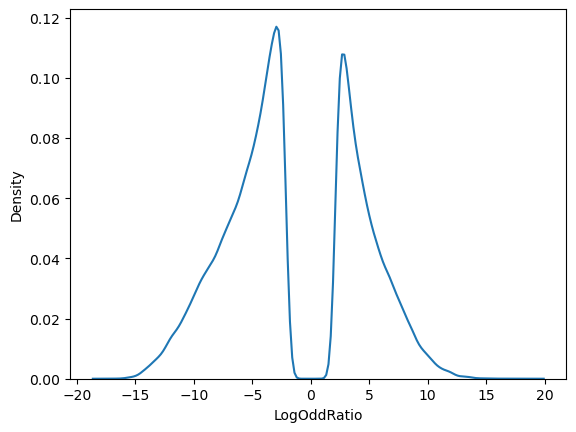

In [57]:
sns.kdeplot(df_interest['LogOddRatio'])
plt.show()

In [58]:
#df_interest['Z_Score'] = stats.zscore(df['LogOddRatio'])

In [59]:
mean = df_interest['LogOddRatio'].mean()
std = df_interest['LogOddRatio'].std()
print(mean, std)

-1.5085866004525268 5.731080702309094


In [60]:
#z_score, p_value = ztest(x1= df_interest['LogOddRatio'], value = mean)

-3.3219280948873626 3.3219280948873626


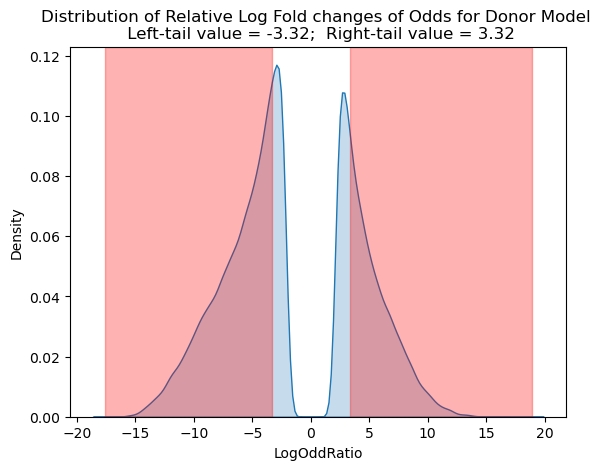

In [61]:
# print(z_score, p_value)
# # Plot the distribution of 'LogOddRatio'

sns.kdeplot(df_interest['LogOddRatio'], fill=True, linewidth=1)

# # Get the extreme values for a two tailed test at alpha = 0.05
# z_critical = norm.ppf(1 - 0.01/2) # two-tailed test at alpha = 0.05


# print(z_critical)
#x1, x2 = mean + 3*std, mean - 3*std
x1= 3.3219280948873626
x2 =-3.3219280948873626
print(x2, x1)

# Shade the area for the two tailed test
plt.axvspan(min(df_interest['LogOddRatio']), x2, alpha=0.3, color='red')
plt.axvspan(x1, max(df_interest['LogOddRatio']), alpha=0.3, color='red')

# Add the observed z-score
# plt.text(-17, 0.5, f'Left-tail value = {x2:.2f}', color='blue', ha='left', va='center')
# plt.text(-3, 0.54, f'Right-tail value = {x1:.2f}', color='blue', ha='right', va='center')


plt.title(f'Distribution of Relative Log Fold changes of Odds for Donor Model \n Left-tail value = {x2:.2f};  Right-tail value = {x1:.2f}')
plt.savefig('Donor_LogOddRatio_Distribution.png')
plt.show()

In [62]:
df_selected = df_interest[(df_interest['LogOddRatio']> x1)|(df_interest['LogOddRatio']<  x2)]

In [63]:
df_selected

,index,chr,strand,Donor_coordinates,Transcript_coordinates,dbsnp_id,varinat_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ensemble_Transcript_ID,Ref_probab,Alt_probab,ScoreChange,LogOddRatio,score_change_new,variant_length
2627,2627,chr1,+,24449588-24449667,24415803-24472976,rs1401534466,24449613,24449615,CC,C,CCAGGCACCTCGTGAGCTGGCCTTTCCTTTTGTACATGGTAAGAGA...,CCAGGCACCTCGTGAGCTGGCCTTTCTTTTGTACATGGTAAGAGAA...,ENST00000003912,0.976278,0.046042,-0.908168,9.735875,-0.930236,2
2673,2673,chr1,+,24449588-24449667,24415814-24466310,rs1401534466,24449613,24449615,CC,C,CCAGGCACCTCGTGAGCTGGCCTTTCCTTTTGTACATGGTAAGAGA...,CCAGGCACCTCGTGAGCTGGCCTTTCTTTTGTACATGGTAAGAGAA...,ENST00000339255,0.976278,0.046042,-0.908168,9.735875,-0.930236,2
2719,2719,chr1,+,24449588-24449667,24415813-24454824,rs1401534466,24449613,24449615,CC,C,CCAGGCACCTCGTGAGCTGGCCTTTCCTTTTGTACATGGTAAGAGA...,CCAGGCACCTCGTGAGCTGGCCTTTCTTTTGTACATGGTAAGAGAA...,ENST00000358028,0.976278,0.046042,-0.908168,9.735875,-0.930236,2
2765,2765,chr1,+,24449588-24449667,24415802-24472976,rs1401534466,24449613,24449615,CC,C,CCAGGCACCTCGTGAGCTGGCCTTTCCTTTTGTACATGGTAAGAGA...,CCAGGCACCTCGTGAGCTGGCCTTTCTTTTGTACATGGTAAGAGAA...,ENST00000374399,0.976278,0.046042,-0.908168,9.735875,-0.930236,2
3089,3089,chr1,+,24458938-24459017,24415803-24472976,rs1479852926,24458982,24458983,G,C,GGGCTACATTCTGTCCACAACCATTGCTATCACAGCAGGTAAGGGT...,GGGCTACATTCTGTCCACAACCATTGCTATCACAGCAGGTAAGGCT...,ENST00000003912,0.562571,0.107575,-0.255967,3.415373,-0.454996,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17521,82091,chrY,-,12663321-12663400,12661312-12663474,rs1603193991,12663382,12663383,G,C,ACAGGCTCGAAACTGGCTCGTTGCACCAAATGCTCTTACCCAGGTG...,ACAGGCTCGAAACTGGCTCGTTGCACCAAATGCTCTTACCCAGGTG...,ENST00000662422,0.251826,0.955723,0.672730,-6.002908,0.703897,1
17524,82094,chrY,-,12663321-12663400,12662537-12688255,rs1603193991,12663382,12663383,G,C,ACAGGCTCGAAACTGGCTCGTTGCACCAAATGCTCTTACCCAGGTG...,ACAGGCTCGAAACTGGCTCGTTGCACCAAATGCTCTTACCCAGGTG...,ENST00000417071,0.251826,0.955723,0.672730,-6.002908,0.703897,1
17527,82097,chrY,-,12663321-12663400,12662334-12692233,rs1603193991,12663382,12663383,G,C,ACAGGCTCGAAACTGGCTCGTTGCACCAAATGCTCTTACCCAGGTG...,ACAGGCTCGAAACTGGCTCGTTGCACCAAATGCTCTTACCCAGGTG...,ENST00000440408,0.251826,0.955723,0.672730,-6.002908,0.703897,1
17530,82100,chrY,-,12663321-12663400,12662368-12860802,rs1603193991,12663382,12663383,G,C,ACAGGCTCGAAACTGGCTCGTTGCACCAAATGCTCTTACCCAGGTG...,ACAGGCTCGAAACTGGCTCGTTGCACCAAATGCTCTTACCCAGGTG...,ENST00000651177,0.251826,0.955723,0.672730,-6.002908,0.703897,1


In [64]:
len(df_selected['dbsnp_id'].unique())

122487

In [65]:
len(df_selected['Donor_coordinates'].unique())

72436

In [67]:
df_selected.to_csv("/data/projects/PSB/Output/Donor/Donor_candidates.tsv", sep= "\t", index=False)
# Save to a .tsv file
np.savetxt("/data/projects/PSB/Output/Donor/Donor_Unique_DBSNP.tsv", df_selected['dbsnp_id'].unique(), delimiter="\t", fmt='%s')
np.savetxt("/data/projects/PSB/Output/Donor/Donor_Unique_Donor.tsv", df_selected['Donor_coordinates'].unique(), delimiter="\t", fmt='%s')

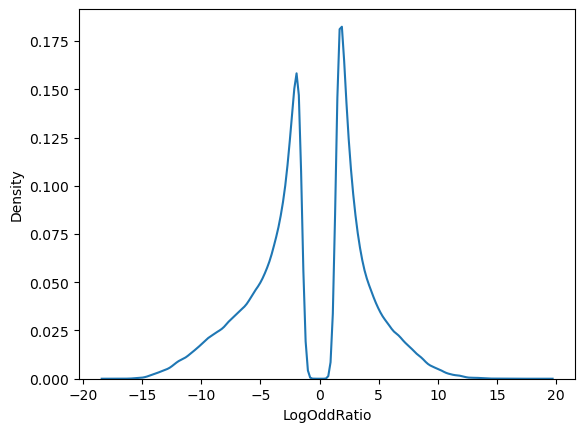

In [80]:
sns.kdeplot(df_interest['LogOddRatio'])
plt.show()


In [26]:
df_interest['reference_seq'].unique()

array(['GAGTGGAGCACTGTACATACCTGGCTGGATTGAGAATGGTAAGTAATTTGTAATAACATACCTGGCTTGTGCAAAAGCA',
       'AGATTTCACCTCTGCAAATATGAGAGATTCTGCAGAAGGTAAGCTTGTGATATTGGCTTGGTCTGAATTGGGTGTGTAT',
       'CTGGGTAATGCTGGTCACCAGCCTTGTGGCCCTTCAAGGTATGTCCAAAAGAGCCGTAAGCACCCCAAGCAATGAGGGT',
       'CTACTACTACTATTCTGCAAACGAGGAATTCAGACCAGGTAAGTACCCATGCGTCTCATTTTGGAGGAATAGGTTTAAA',
       'TCTCTCAGTGGTCGCTATCTGGAGGAGCTTAGCCAAAGGTAAGCTTTATTATGAATTAGCACAGTCAGCTTCACACAGT',
       'TCTGACCAGTGCTGCTGTGACGAATCTTTCAGTTACAGGTAAGCAGCTGCCAGGCCATGCACCTGCTGAGCACATGGGA',
       'GCTGAAAAATATTATGGCAACAAATGCATTATTCCATGGTAAGATACGTCTCATTATTGGAGTGTGTCTGAACATATAT',
       'CAGTATCTGATTTCCACCCAGTCAAAAAAATTGTCCAGGTAAGCACAATATCCCTATTTATTTTCAGTCCTACCTCAAG',
       'TTTGAAAACTTGTCTCCAGGAAGTGTTATTATATTCAGGTATGTTAATTGAGCTCAAACTGTTGACTTTACTTATATTT',
       'TCACATCCATCAGAGGATTGCTGATCACTCTTACCAAGGTATGTTTTATCACAGTGTTAAAAAGTACTGCTTATCATTT',
       'AACCAAATTTATATCTGCTTGGAACAACATGAAATATAGTAAGTATCATGTTTTAAAAATTGTATAAATCCAAAGAAAT',
       'AC

In [27]:
df_interest.groupby(['dbsnp_id', 'ref_neucleotide','alternative_neucleotide',  'reference_seq']).size()

dbsnp_id      ref_neucleotide                 alternative_neucleotide     reference_seq                                                                  
rs1057516984  TT                              TTT                         TTTGAAAACTTGTCTCCAGGAAGTGTTATTATATTCAGGTATGTTAATTGAGCTCAAACTGTTGACTTTACTTATATTT     7
rs10626387    T                               TCT                         AAAGACTTGTCATTTGATCCATGTTCAAGACCCTTGAGGTATTGTTTCATCATTTCTGTATTGTCTTTCAATAAAGAAA    15
rs10668386    .                               TC                          AAAGACTTGTCATTTGATCCATGTTCAAGACCCTTGAGGTATTGTTTCATCATTTCTGTATTGTCTTTCAATAAAGAAA    15
rs1158710364  TA                              TATA                        CTAACCATCATATTTAGAACCAGCTGTTTACCAGAGTGGTAAGTTGGATTGTGTTTTATTTTGGTTTTTATTCTTCATT     2
rs1172687424  G                               T                           CTACTACTACTATTCTGCAAACGAGGAATTCAGACCAGGTAAGTACCCATGCGTCTCATTTTGGAGGAATAGGTTTAAA     5
rs1197477113  .                               

In [28]:
df_interest.groupby(['dbsnp_id', 'ref_neucleotide','alternative_neucleotide']).size()

dbsnp_id      ref_neucleotide                 alternative_neucleotide   
rs1057516984  TT                              TTT                            7
rs10626387    T                               TCT                           15
rs10668386    .                               TC                            15
rs1158710364  TA                              TATA                           2
rs1172687424  G                               T                              5
rs1197477113  .                               AG                             6
rs1202559184  .                               CG                             5
rs1209017757  .                               A                              1
rs1212185079  TATTAT                          TAT                            2
rs1230423427  AA                              AAA                            1
rs1289052837  .                               C                              9
rs1297116846  A                               AA          

-0.267426781822307 0.7891405811788812


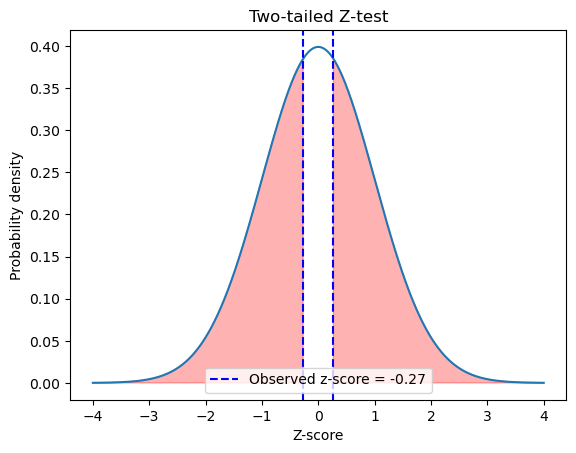

In [157]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from statsmodels.stats.weightstats import ztest

# Generate 1000 normally distributed data points
mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

# Perform the z test
z_score, p_value = ztest(x1= s, value = mu)

print(z_score, p_value)

# # Generate data and plot the normal distribution
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)
plt.plot(x, y)

# Shade the two-tail regions
plt.fill_between(x, 0, y, where=(x <= -abs(z_score)) | (x >= abs(z_score)), color='red', alpha=0.3)

# # Mark the observed value
plt.axvline(z_score, color='blue', linestyle='--', label=f'Observed z-score = {z_score:.2f}')
plt.axvline(-z_score, color='blue', linestyle='--')

plt.legend()
plt.title('Two-tailed Z-test')
plt.xlabel('Z-score')
plt.ylabel('Probability density')
plt.show()

Means (mu) of the Gaussians:  [-0.75858246  3.20265316]
Lower tails:  [-3.55298982 -3.22340315  2.26163632  2.52124164  5.19931919  4.31052746
  4.28026305  2.95134775  3.5598492   2.80369922  4.82035782  3.63443643
  4.57265592  2.06716181  2.17990061  2.96595917  3.75830347  7.5186179
  2.9154857   2.30803645  2.07280805  3.96296295  3.12652399  3.31301308
  3.46436207  1.80536786  2.52415654  2.01336023  1.91427705  3.83210009
  4.5623962   5.98896909  3.85251746  4.35381607  1.72512595  2.20545637
  2.73423884  2.40441824  2.38197406  5.30466313  5.15923718  4.04212975
  1.84842406  3.28390633  2.36134317  4.3830775   4.38949829  1.54880524
  4.22075876  1.98636729  1.80737192  2.89486541  3.37755719  4.04778205
  3.17684417  2.37822766  3.19480033  3.79809269  6.91182462  3.78018665
  1.69518284  2.21809325  3.98748355  2.76779212  7.12898572  2.77891869
  5.04034542  1.6159003   6.07275411  3.57268738  4.21768767  5.42229058
  4.37963633  5.60369246  1.74382488  2.03794576  7.607

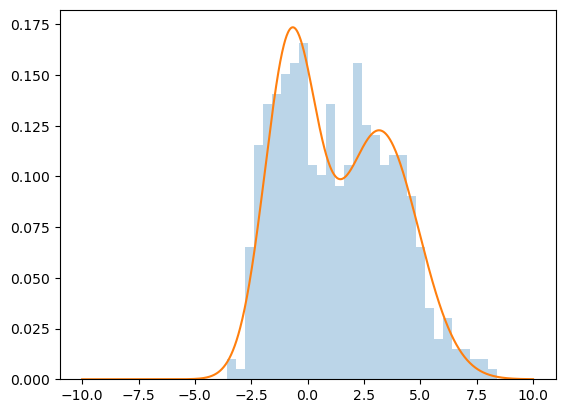

In [39]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Create some data
np.random.seed(0)
data = np.concatenate([np.random.normal(loc=-1, scale=1, size=(200, 1)),
                       np.random.normal(loc=3, scale=2, size=(300, 1))])

# Fit a Gaussian mixture with EM
gmm = GaussianMixture(n_components=2)
gmm.fit(data)

# Print the means (mu)
print("Means (mu) of the Gaussians: ", gmm.means_.flatten())


# Standard deviations from the mean to consider a "tail"
threshold = 2

# Calculate the lower and upper tail thresholds for each component
lower_thresholds = gmm.means_.flatten() - threshold * np.sqrt(gmm.covariances_.flatten())
upper_thresholds = gmm.means_.flatten() + threshold * np.sqrt(gmm.covariances_.flatten())

# Find tail points
lower_tails = data[(data <= lower_thresholds[0]) | (data >= upper_thresholds[0])]
upper_tails = data[(data <= lower_thresholds[1]) | (data >= upper_thresholds[1])]

print("Lower tails: ", lower_tails)
print("Upper tails: ", upper_tails)






# Now plot the data and the model
plt.hist(data, bins=30, density=True, alpha=0.3)

x = np.linspace(-10, 10, 1000)
y = np.exp(gmm.score_samples(x.reshape(-1, 1)))
plt.plot(x, y)
plt.show()



In [44]:
# Let's calculate tailing points for both Gaussian components in the mixture.
def calculate_tailing_points(mean, std_dev, n_std_dev=3):
    """Calculate tailing points n standard deviations from the mean"""
    lower_tail = mean - n_std_dev * std_dev
    upper_tail = mean + n_std_dev * std_dev

    return lower_tail, upper_tail

# Tail points for the first Gaussian component
mean1 = gmm.means_[0][0]
std_dev1 = np.sqrt(gmm.covariances_[0][0][0])
lower_tail1, upper_tail1 = calculate_tailing_points(mean1, std_dev1, n_std_dev=2)
print(f'Tailing points for first component are: {lower_tail1}, {upper_tail1}')

# Tail points for the second Gaussian component
mean2 = gmm.means_[1][0]
std_dev2 = np.sqrt(gmm.covariances_[1][0][0])
lower_tail2, upper_tail2 = calculate_tailing_points(mean2, std_dev2, n_std_dev=2)
print(f'Tailing points for second component are: {lower_tail2}, {upper_tail2}')


Tailing points for first component are: -3.062701595736802, 1.545536682037822
Tailing points for second component are: -0.22295399793421833, 6.628260314077763
